In [1]:
#Importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns

In [2]:
os.getcwd(), os.listdir()

('C:\\Users\\kaush\\Desktop\\Machine Learning\\Experiments with Data\\Advanced Regression',
 ['.ipynb_checkpoints',
  'data_description.txt',
  'Kaggle_Advanced_Regression_House_Prices.ipynb',
  'sample_submission.csv',
  'test.csv',
  'train.csv'])

In [2]:
#loading the data
train=pd.read_csv('C:\\Users\\kaush\\Desktop\\Machine Learning\\Experiments with Data\\Advanced Regression\\train.csv')
test=pd.read_csv('C:\\Users\\kaush\\Desktop\\Machine Learning\\Experiments with Data\\Advanced Regression\\test.csv')

In [3]:
#Using set_options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Plotting the shape of the Training and Test set

print("The number of houses in test set are", train.shape[0], " and the number of features are ", train.shape[1])
print("The number of houses in test set are", test.shape[0], " and the number of features are ", test.shape[1])
print("The objectuve is to predict the sales price of the plot, which is mentioned in the Train file but is abscent in Test file")

The number of houses in test set are 1460  and the number of features are  81
The number of houses in test set are 1459  and the number of features are  80
The objectuve is to predict the sales price of the plot, which is mentioned in the Train file but is abscent in Test file


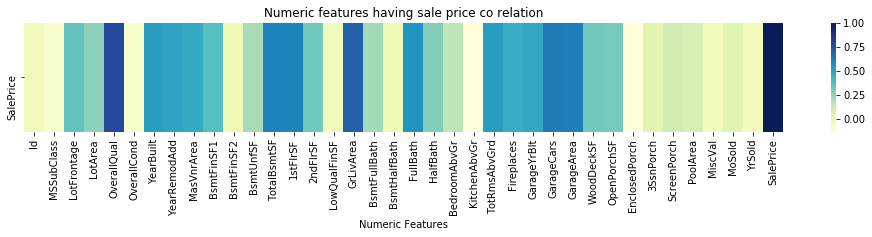

In [4]:
# Checking the correlation of different numeric factors with the sale price
# train.info():  This was used to check different data types available, so that numeric data type is only selected
num=train.select_dtypes(exclude=['object'])
numcorr=num.corr()
plt.subplots(figsize=(17,2))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1),cmap="YlGnBu")
plt.title("Numeric features having sale price co relation")
plt.xlabel("Numeric Features")
plt.show()

In [5]:
# Identifying the parameters who have max correlation with sales price

print("The features having max positive corelation are: ", numcorr['SalePrice'].sort_values(ascending=False).head(15).to_frame())

The features having max positive corelation are:                SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897
YearRemodAdd   0.507101
GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420


In [8]:
# Here we can see 3-4 cases where we can see high corelation with salesprice. Lets see these cases graphically

def plot_scatter(x, y=train['SalePrice']):
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,color='crimson',marker='o')
    plt.ylabel("Sales Price")
    plt.grid()
    plt.show()

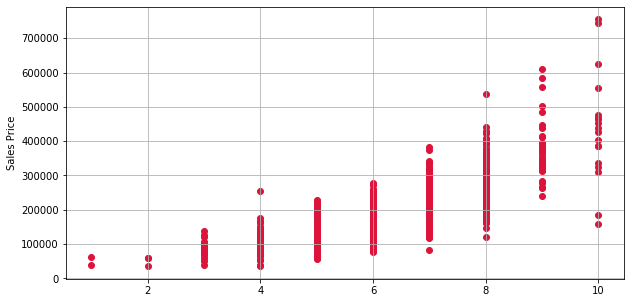

In [9]:
plot_scatter(train['OverallQual'],train['SalePrice'])

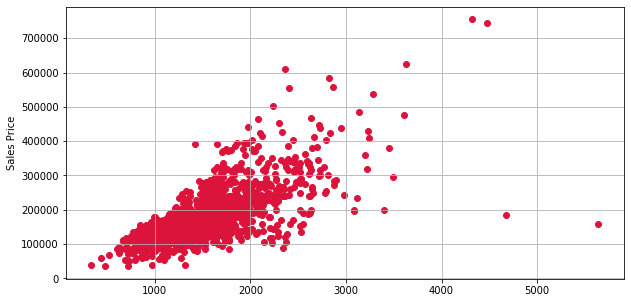

In [10]:
plot_scatter(train['GrLivArea'],train['SalePrice'])

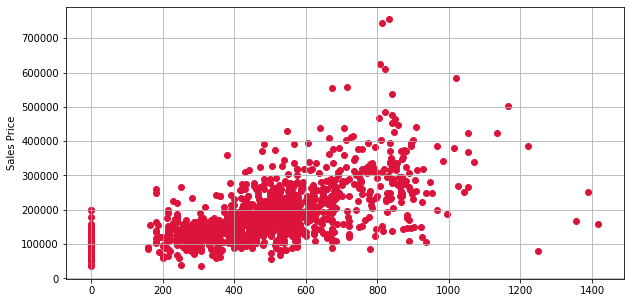

In [11]:
plot_scatter(train['GarageArea'],train['SalePrice'])

In [12]:
#How do we see the significance of the category type filters
#Plotting a horizontal bar chart to show the same
def non_cat_plot(pq):  
    fig,ax=plt.subplots(figsize=(8,10))
    data_noncat=train.select_dtypes(include='object')[pq].value_counts().sort_values(ascending=True).to_frame()
    mn=ax.barh(data_noncat.index, data_noncat[pq], color='crimson')
    ax.grid(color='grey', ls='--')
    ax.set_xlabel("Count")
    ax.set_ylabel(pq)
    ax.set_title(pq)
    for i in ax.patches:
        ax.text(i.get_width(),i.get_y()+0.2, str(round((i.get_width()),2)), fontsize=10, fontweight='bold', color='grey')

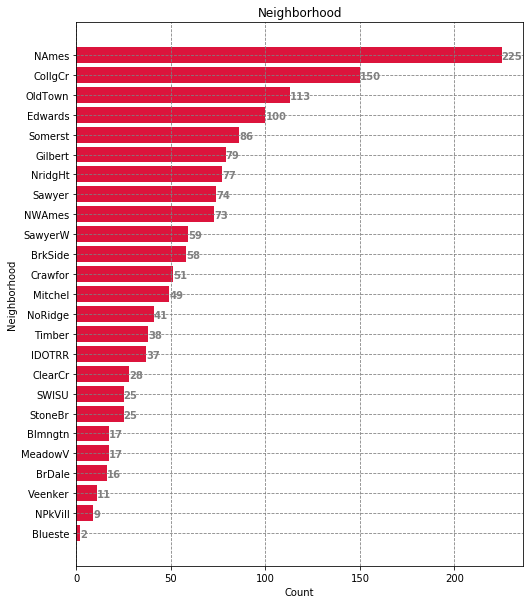

In [13]:
non_cat_plot('Neighborhood')

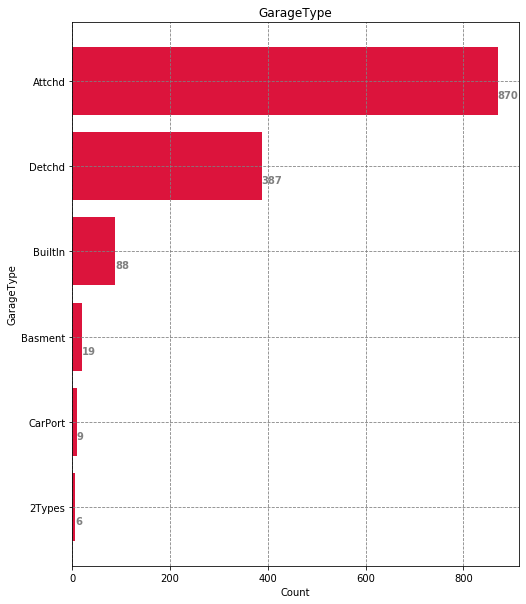

In [14]:
non_cat_plot('GarageType')

In [15]:
# To understand Categorical features one by one
data_cat=train.select_dtypes(include='object')

#data_cat.iloc[:,0].value_counts()
for i in range(len(data_cat.columns)):
    print("Description of: ",data_cat.columns[i], data_cat.iloc[:,i].value_counts())



Description of:  MSZoning RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Description of:  Street Pave    1454
Grvl       6
Name: Street, dtype: int64
Description of:  Alley Grvl    50
Pave    41
Name: Alley, dtype: int64
Description of:  LotShape Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Description of:  LandContour Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Description of:  Utilities AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Description of:  LotConfig Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Description of:  LandSlope Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Description of:  Neighborhood NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     

## Handling Null values in the Data

In [16]:
# Combining the two datasets so that these can be preprocessed accordingly

y_train=train['SalePrice'].to_frame()  # Keeping Y train separate
# Combining Train and Test sets accordingly
c = pd.concat((train,test), sort=False).reset_index(drop=True)
c.drop(['SalePrice','Id'], axis=1,inplace=True )
print("The total size of dataframe is:", c.shape)


The total size of dataframe is: (2919, 79)


In [17]:
#Data Cleaning
#Checking the null values

na_c=c.isna().sum().sort_values(ascending=False).head(10)
print('The % of null values in all features are:\n' , (na_c/c.shape[0])*100) # Thus we can see that 5 features contribute to max null values

The % of null values in all features are:
 PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
dtype: float64


In [18]:
# Lets delete the cases where the threshold is>20%

c=c.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)


In [19]:
print("The new shape after deleting NA majority columns is: ", c.shape)

The new shape after deleting NA majority columns is:  (2919, 74)


In [20]:
# What is to be done in the remaining cases, we have two types of values Categorical and non categorical. Need to divide the features accordingly

na=c.isna().sum()
na=na[na>0].sort_values(ascending=False).to_frame()
print(na)   # These are some of the features which needs to be divided into categorical and numerical types


                0
LotFrontage   486
GarageQual    159
GarageFinish  159
GarageYrBlt   159
GarageCond    159
GarageType    157
BsmtExposure   82
BsmtCond       82
BsmtQual       81
BsmtFinType2   80
BsmtFinType1   79
MasVnrType     24
MasVnrArea     23
MSZoning        4
BsmtFullBath    2
Functional      2
Utilities       2
BsmtHalfBath    2
Exterior2nd     1
Exterior1st     1
SaleType        1
BsmtFinSF1      1
BsmtFinSF2      1
TotalBsmtSF     1
Electrical      1
KitchenQual     1
GarageCars      1
GarageArea      1
BsmtUnfSF       1


In [21]:
NA=c[na.index.to_list()]  # Getting all the features which have 
#Dividing the value in categorical and non categorical values

NAcat=NA.select_dtypes(include='object')
NAint=NA.select_dtypes(exclude='object')

print("We have",NAcat.shape[1]," categorical features")
print("We have",NAint.shape[1]," numerical features")

We have 18  categorical features
We have 11  numerical features


In [22]:
#Dealing with Numerical features
#NAint.isna().sum()
c['LotFrontage']=c['LotFrontage'].fillna(c['LotFrontage'].median())  # Filling lot frontage with median data
c['GarageYrBlt']=c['GarageYrBlt'].fillna(1979) # The median year is 1979
c['MasVnrArea']=c['MasVnrArea'].fillna(0)
c['BsmtFullBath']=c['BsmtFullBath'].fillna(0)
c['BsmtHalfBath']=c['BsmtHalfBath'].fillna(0)
c['BsmtFinSF1']=c['BsmtFinSF1'].fillna(0)
c['BsmtFinSF2']=c['BsmtFinSF2'].fillna(0)
c['TotalBsmtSF']=c['TotalBsmtSF'].fillna(0)
c['GarageCars']=c['GarageCars'].fillna(0)
c['GarageArea']=c['GarageArea'].fillna(0)
c['BsmtUnfSF']=c['BsmtUnfSF'].fillna(0)


In [23]:
#Dealing with Categorical Features

NAcat.isna().sum()

GarageQual      159
GarageFinish    159
GarageCond      159
GarageType      157
BsmtExposure     82
BsmtCond         82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Functional        2
Utilities         2
Exterior2nd       1
Exterior1st       1
SaleType          1
Electrical        1
KitchenQual       1
dtype: int64

In [24]:
# For the cases with few missing values we will map the NA numbers through ffill
# For the cases with large missing values we will map None (in this we are assuming that the categories do not have any features)
c['Electrical']=c['Electrical'].fillna(method='ffill')
c['SaleType']=c['SaleType'].fillna(method='ffill')
c['KitchenQual']=c['KitchenQual'].fillna(method='ffill')
c['Exterior1st']=c['Exterior1st'].fillna(method='ffill')
c['Exterior2nd']=c['Exterior2nd'].fillna(method='ffill')
c['Functional']=c['Functional'].fillna(method='ffill')
c['Utilities']=c['Utilities'].fillna(method='ffill')
c['MSZoning']=c['MSZoning'].fillna(method='ffill')


In [25]:
# Dealing with larger quantity categorical missing values

NAcols=c.columns

for cols in NAcols:
    if c[cols].dtype=="object":
        c[cols]=c[cols].fillna("None")

In [26]:
c.isna().sum().head()  # this shows that we do not have any null values in the dataframe


MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
dtype: int64

## Encoding Categorical Features

In [27]:
# Checking the numerical values which are actually categorical
c['MoSold']=c['MoSold'].astype('str')
c['YrSold']=c['YrSold'].astype('str')
c['MSSubClass']=c['MSSubClass'].astype('str')


In [28]:
# Converting the categorical variables into dummy variables

cb=pd.get_dummies(c)

In [29]:
print(" The shape of the original data is:", c.shape)
print(" The shape of the one hot encoaded data is:", cb.shape)

 The shape of the original data is: (2919, 74)
 The shape of the one hot encoaded data is: (2919, 309)


In [30]:
# Again separating the dataset into training and test set as after data preprocessing

train.shape, test.shape

((1460, 81), (1459, 80))

In [31]:
size_train=train.shape[0]
size_test=test.shape[0]
# Segreggated into train and test set
Train=cb[:size_train]
Test=cb[size_train:]


## Outlier Detection

In [32]:
# Some suggested Reads on outlier detection

Train.select_dtypes(exclude='object').head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd

Text(0.5, 1.0, 'Sale prive vs Total Rms Above ground')

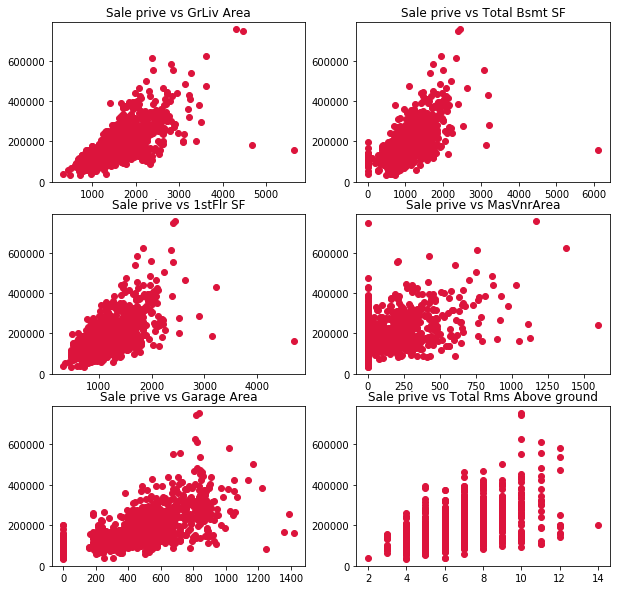

In [33]:
# Important features where outliers can lie

fig=plt.figure(figsize=(10,10))
ax=plt.subplot2grid((3,2),(0,0))
plt.scatter(y=train['SalePrice'], x=train['GrLivArea'], color='crimson')
plt.title("Sale prive vs GrLiv Area",loc='center', fontsize=12 )

ax=plt.subplot2grid((3,2),(0,1))
plt.scatter(y=train['SalePrice'], x=train['TotalBsmtSF'], color='crimson')
plt.title("Sale prive vs Total Bsmt SF",loc='center', fontsize=12 )

ax=plt.subplot2grid((3,2),(1,0))
plt.scatter(y=train['SalePrice'], x=train['1stFlrSF'], color='crimson')
plt.title("Sale prive vs 1stFlr SF",loc='center', fontsize=12 )

ax=plt.subplot2grid((3,2),(1,1))
plt.scatter(y=train['SalePrice'], x=train['MasVnrArea'], color='crimson')
plt.title("Sale prive vs MasVnrArea",loc='center', fontsize=12 )

ax=plt.subplot2grid((3,2),(2,0))
plt.scatter(y=train['SalePrice'], x=train['GarageArea'], color='crimson')
plt.title("Sale prive vs Garage Area",loc='center', fontsize=12 )

ax=plt.subplot2grid((3,2),(2,1))
plt.scatter(y=train['SalePrice'], x=train['TotRmsAbvGrd'], color='crimson')
plt.title("Sale prive vs Total Rms Above ground",loc='center', fontsize=12 )




In [34]:
#Outlier Article: http://colingorrie.github.io/outlier-detection.html
# Creating an outlier function using Inter quartile range

def identify_outliers(variable, df):
    var=df[variable]
    q25, q75= np.percentile(var,25), np.percentile(var,75)
    print("25th percentile is {} and the 75th percentile is {} ".format(q25,q75))
    var_iqr=q75-q25  # Calculating interquartile range
    print("The interquartile range is:", var_iqr)
    var_cut_off=var_iqr * 1.5
    print("The cutoff factor is: ", var_cut_off)
    low_var_cutoff, higher_var_cutoff= q25-var_cut_off, q75+var_cut_off
    print("The lower cutoff is {} and the higher cut off is {}". format(low_var_cutoff, higher_var_cutoff))
    outliers= [x for x in var if x < low_var_cutoff or x > higher_var_cutoff]
    print("The number of outliers to be removed are:", len(outliers))





In [35]:
identify_outliers(variable='1stFlrSF', df=train)


25th percentile is 882.0 and the 75th percentile is 1391.25 
The interquartile range is: 509.25
The cutoff factor is:  763.875
The lower cutoff is 118.125 and the higher cut off is 2155.125
The number of outliers to be removed are: 20


In [36]:
"""as of now i am copying the kaggle code from other notebook as I am pushing to work on machine learning code. I will come back at this section to sort it out"""

'as of now i am copying the kaggle code from other notebook as I am pushing to work on machine learning code. I will come back at this section to sort it out'

In [37]:
Train.shape, Test.shape, train.shape, test.shape # Train with Cap T is with Categories with Features and without cap t is without feature 

((1460, 309), (1459, 309), (1460, 81), (1459, 80))

In [38]:
target=train[['SalePrice']]# getting the target removed from training list

target.shape, Train.shape

((1460, 1), (1460, 309))

In [39]:
# Dropping the outlier position from both target and training set 

Train1=Train.copy()
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)
Train1.drop(Train1.index[pos], inplace=True)

In [40]:
print("the new shape of target is: {}, and train is {}".format(target.shape, Train1.shape))

the new shape of target is: (1457, 1), and train is (1457, 309)


In [41]:
# Removing skewness from the data
# Useful link: https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

#Checking the skewness and kurtosis on one feature
print("The skewness of GrLivArea is: {} and the kurtosis of GrLivArea is {}".format(Train1['GrLivArea'].skew(),Train1['GrLivArea'].kurt()))

# Ideally the skewness should be around 0 and kurtosis value should be around 3

The skewness of GrLivArea is: 1.0127645385480262 and the kurtosis of GrLivArea is 2.0672339304153655


In [42]:
# to correct skewness and kurtosis we do log transform
# We will not remove skewness and kurtosis here as we have already removed the outliers in the previous steps
# Lets check the skewness and kurtosis of target feature

print("The skewness and kurtosis of target variable(SalePrice) is: {} and {}".format(target['SalePrice'].skew(), target['SalePrice'].kurt()))



The skewness and kurtosis of target variable(SalePrice) is: 1.8829247000823222 and 6.527120338179705


In [43]:
# Taking the log Transform

target['SalePrice']=np.log1p(target['SalePrice'])
print("The skewness and kurtosis of target variable(SalePrice) is: {} and {}".format(target['SalePrice'].skew(), target['SalePrice'].kurt()))

# Thus the skewness in the target data is removed
# Need to convert the data into original format of sales price by using np.expm1

The skewness and kurtosis of target variable(SalePrice) is: 0.12299462625722304 and 0.8062416349541666


## Machine Learning

In [46]:
Train1.shape, target.shape

((1457, 309), (1457, 1))

In [47]:
type(Train1), type(target)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [48]:
x, y= Train1, np.array(target)

In [51]:
x.shape, y.shape, type(x), type(y)

((1457, 309), (1457, 1), pandas.core.frame.DataFrame, numpy.ndarray)

In [52]:
# Splitting the Train and Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 309), (438, 309), (1019, 1), (438, 1))

In [57]:
#Scaling the data

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
test=scaler.transform(Test)


In [60]:
#further data exploration
%matplotlib inline
plt.figure(figsize=(50,50))
traintrain.select_dtypes(exclude='object')  

(1019, 309)

In [16]:
train_int.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
def hist_plot(column,bin=50):
    plt.hist(train_int[column], bins=bin)
    plt.show()

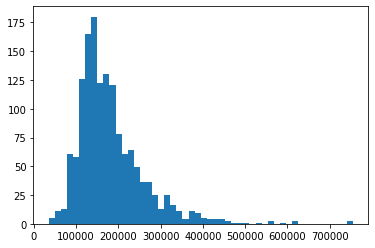

In [20]:
hist_plot(column="SalePrice", bin=50)

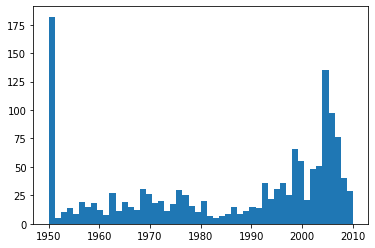

In [28]:
hist_plot('YearRemodAdd', bin=50)

In [29]:
train_int.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

AttributeError: 'PathCollection' object has no property 'colorbar'

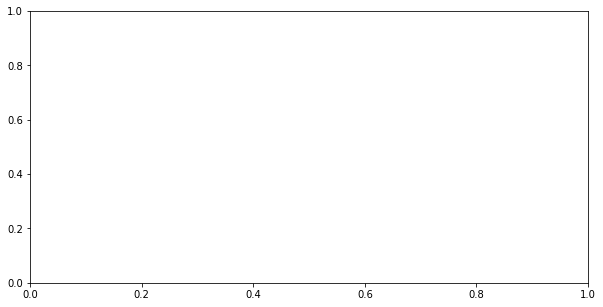

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(x=train_int['SalePrice'], y=train_int['LotArea'], alpha=0.2,s=train_int['WoodDeckSF'], label="MasVnrArea", c=train_int["MasVnrArea"], cmap=plt.get_cmap("jet"))
cb = fig.colorbar(heatmap, cax=cax, orientation='horizontal')
plt.legend()
plt.show()